<a href="https://colab.research.google.com/github/Leo2park/new/blob/main/Bigdata_S5_Scipy%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_LAB_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0.데이터 다운로드

In [2]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (50/50), 442.37 KiB | 3.88 MiB/s, done.


In [3]:
import scipy
scipy.__version__

'1.10.1'

In [ ]:
!pip install scipy==1.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 확률분포 그리기

### 1.이산형 확률분포 
- Probability Mass Function, PMF, 𝐲=𝒇(𝒙)
- 이산 확률 변수에서 특정 값에 대한 확률을 계산하기 위한 함수

#### 1-1.기하 분포

<function matplotlib.pyplot.show(close=None, block=None)>

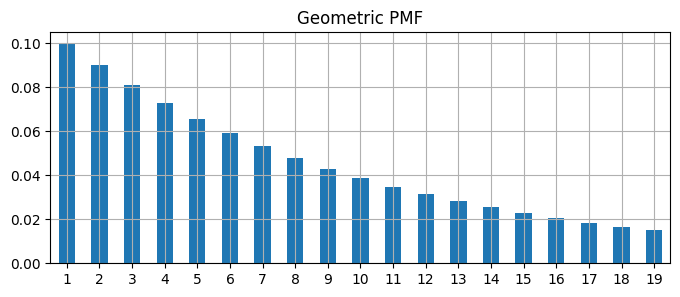

In [ ]:
# 확률이 0.1인 기하분포
from scipy.stats import geom
import pandas as pd
import matplotlib.pyplot as plt
# geom(p=c)
# y1 = geom(p=c).pmf(x)
# y1 = geom(p=c).cdf(x)

#야구 선수 홈런칠 확률 10% x번째 타석 이내에 홈런칠 확률
# geom(p=0.1).cdf(x)
#야구 선수 홈런칠 확률 10% x번째 타석 이상에 홈런칠 확률
# 1-geom(p=0.1).cdf(x)
#야구 선수 홈런칠 확률 10% x번째 에서 홈런칠 확률
# geom(p=0.1).pmf(x)

sp = 0.1
x = range(1,20)
y = geom(p=sp).pmf(x)
s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8,3), rot=0, grid=True, title='Geometric PMF')
plt.show

#### 1-2.초기하 분포

[3.0203000e-04 3.5533300e-03 1.8825810e-02 5.9674250e-02 1.2680778e-01
 1.9182559e-01 2.1409106e-01 1.8028721e-01 1.1617646e-01 5.7760050e-02
 2.2237620e-02 6.6282000e-03 1.5234200e-03 2.6785000e-04 3.5570000e-05
 3.5000000e-06 2.5000000e-07 1.0000000e-08 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


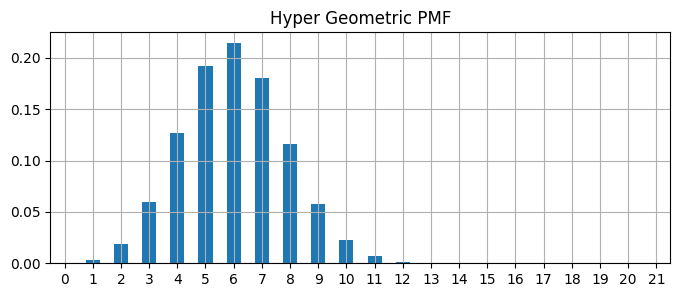

In [ ]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수)
# M, n, N = 100, 30, 20

from scipy.stats import hypergeom
import pandas as pd
import matplotlib.pyplot as plt

a,b,c = 100, 30, 20
x = range(c+2) # 0 ~ 21
y = hypergeom(M=a,n=b,N=c).pmf(x)
s = pd.Series(y, index=x)
print(s.to_numpy().round(8))
s.plot(kind='bar', figsize=(8,3), grid=True, rot=0, title='Hyper Geometric PMF')
plt.show()


[0.029412 0.196078 0.392157 0.294118 0.081699 0.006536 0.      ]


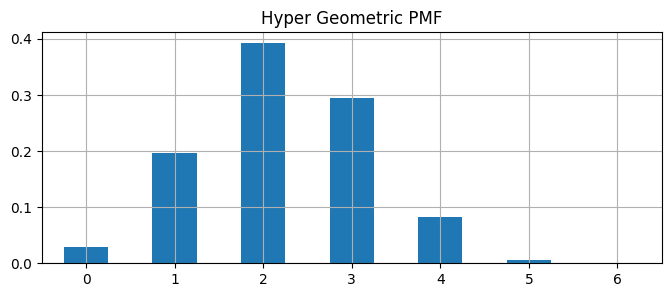

In [ ]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수)

from scipy.stats import hypergeom
import pandas as pd
import matplotlib.pyplot as plt

a,b,c = 18, 8, 5
x = range(c+2) # 0 ~ 12
y = hypergeom(M=a,n=b,N=c).pmf(x)
s = pd.Series(y, index=x)
print(s.to_numpy().round(6))
s.plot(kind='bar', figsize=(8,3), grid=True, rot=0, title='Hyper Geometric PMF')
plt.show()

#### 1-3.포아송 분포

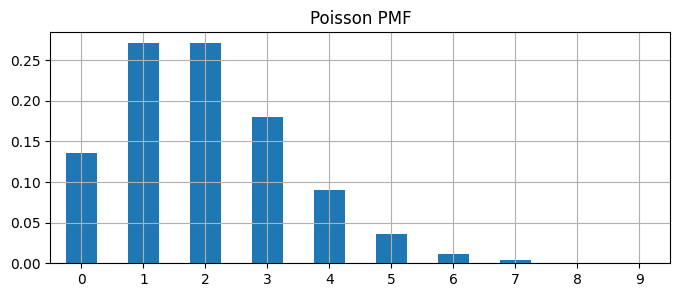

In [ ]:
# mu = 단위/공간당 평균 발생 횟수
# 평균 2회 발생 횟수를 갖는 포아송 분포

from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt

mu = 2
x = range(5*mu)
y = poisson(mu=mu).pmf(x)
s = pd.Series(y, index =x)
s.plot(kind='bar', figsize=(8,3), rot=0, grid = True, title = 'Poisson PMF')
plt.show()

### 2.연속형 확률분포 객체 생성

PDF(Probability Density Function) : 확률 밀도 함수
- 연속적인 변수에 의한 확률 분포 함수
- 항상 양의 값을 가져야 하며, 모든 범위의 PDF를 합한 값은 1임
- f(x) >= 0
- 분포내 특정 값에서의 확률은 0, P(X=a) = 0, 정의된 범위 내에서의 확률은 범위내의 pdf 영역 넓이(적분값)가 됨

#### 2-1. 표준정규분포

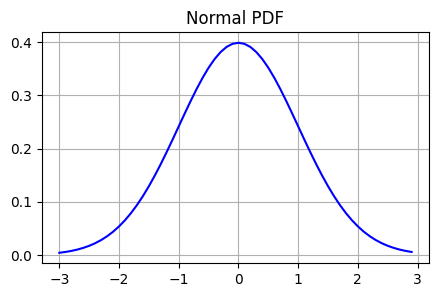

In [1]:
# # 표준정규분포 객체 생성 및 그래프 그리기
# from scipy.stats import norm
# mu = 0
# std =1
# y1=norm(loc=mu, scale=std).pdf(x)
# y2=norm(loc=mu, scale=std).cdf(x)
# y3=norm(loc=mu, scale=stderr).ppf(confidence)
# #신뢰도 95% [0.025 0.975] loc:평균 scale:표준오차 

# r1,r2 = norm.interval(confidence, loc=mu, scale=stderr)
# #표준오차 구하는법 >>>stats.dem(data)   (=표준오차/n **0.5)
# #표본오차 = 임계값 * 표준오차 (=표준오차/n **0.5)

# from scipy.stats import norm

# rv = norm(loc=0, scale=1)
# Z = 1.96
# target = [rv.cdf(Z), rv.cdf(-Z),rv.ppf(0.975),rv.ppf(0.025)]
# result = [round(x,4) for x in target]
# print(result)

from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rv = norm(loc=0, scale=1) # loc = 평균 scale = 표준편차
x = np.arange(-3,3,0.1)
y1 = rv.pdf(x)
y2 = norm.pdf(x, loc=0, scale=1)
normal = pd.Series(y2, index=x)
normal.plot(kind = 'line',title='Normal PDF', figsize=(5,3), grid = True, style= 'b-')
plt.show()

In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기 - loc, scale 대응


#### 2-2. Student t 분포

In [ ]:
from scipy.stats import t
help(t)

In [ ]:
# Student t 분포 객체 생성 및 그래프 그리기


In [ ]:
# 표준정규분포와 스튜던트 t 분표 비교


#### 2-3.지수분포


In [ ]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기


#### 2-4.감마분포

In [ ]:
# Gamma(감마)분포 객체 생성 및 그래프 그리기


### 3.이산형 확률분포 문제

CDF(Cumulative Distribution Function) : 누적 분포 함수
- 어떤 확률 분포에 대해 확률 변수가 특정 값보다 작거나 같은 확률
- f(x) = P(X <= x)
- CDF를 미분하면 PDF, PDF를 적분하면 CDF가 됨

### 3-1.기하분포 활용문제


#### 3-1a.이하일 확률
- geom(p).cdf(x)
- A씨가 계란후라이를 만들 때 노른자를 깨지 않을 확률이 0.2라고 한다. A씨가 적어도 5번 이내에 노른자를 깨지 않을 확률을 구하시오.

In [ ]:
from scipy.stats import geom
# pmf(1) + pmf(2) + .... pmf(5)
result = round(geom(p=0.2).cdf(5),4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
result = round(rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4) + rv.pmf(5),4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
x = range(1,6)
result = round(rv.pmf(x).sum(),4)
print(result)

0.6723


#### 3-1b.이상일 확률
- 1 - geom(p).cdf(x)
- 빅데이터분석기사 실기 합격률은 35%라고 한다. 이 시험에 2번 이상 응시해야 자격증 취득에 성공할 확률을 구하시오.

In [ ]:
result = round(1-geom(p=0.35).cdf(1),4)
print(result)

0.65


#### 3-1c. 특정 횟수일 확률
- geom(p).cdf(x) - geom(p).cdf(x-1)
- A 야구선수의 홈런 칠 확률이 5%일 때, 이 선수가 4번째 타석에서 홈런 칠 확률을 구하시오.

In [ ]:
from scipy.stats import geom
c=0.05
reslut = round(geom(p=c).pmf(4), 4)
print(result)

0.0429


In [ ]:
c=0.05
rv = geom(p=c)
result =  round(rv.cdf(4) - rv.cdf(3),4)
print(result)

0.0429


###3-2.초기하분포 활용문제

In [ ]:
# 파란공, 빨간공 각 8개씩, 5개의 공을 비복원으로 뽑고
# 뽑은 공 중에서 3개 파란공, 2개 빨간 공일 확률
from scipy.stats import hypergeom
a,b,c, = 16,8,5
rv = hypergeom(M=a, n=b, N=c)
round(rv.pmf(3),5),round(rv.pmf(2),5)

(0.35897, 0.35897)

#### 3-2a.이하일 확률
- hypergeom(M, n, N).cdf(x)
- 어느 회사에서 랜덤박스 선물셋트를 50개 준비했다. 선물셋트에 향수가 포함된 것이 8개 라고 한다. 비복원추출로 선물셋트 4개를 뽑았을 때, 향수가 포함된 선물이 2개 이하로 나올 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a,b,c = 50, 8, 4
result = round(hypergeom(M=a, n=b, N=c).cdf(2),4)   #x=0,1,2
print(result)

0.9895


In [ ]:
from scipy.stats import hypergeom
a,b,c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.pmf(0) +rv.pmf(1)+rv.pmf(2),4)   #x=0,1,2
print(result)

0.9895


In [ ]:
from scipy.stats import hypergeom
a,b,c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
x = range(3)
result = round(rv.pmf(x).sum(),4)   #x=0,1,2
print(result)

0.9895


#### 3-2b.이상일 확률
- 1 - hypergeom(M, n, N).cdf(x)
- 짱구엄마가 사과 20개와 배 8를 사왔다. 비복원추출로 사과와 배 5개를 집었을 때 배가 2개 이상일 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a,b,c = 28, 8, 5
result = round(1-hypergeom(a,b,c).cdf(1),4)
print(result)  

0.4479


#### 3-3c.특정 횟수일 확률
- hypergeom(M, n, N).cdf(x) - hypergeom(M, n, N).cdf(x-1)
- 뽑기 기계에 꽝이 아닌 것이 10개, 꽝이 30개 포함되어 있다고 한다. 비복원추출로 4개를 뽑았을 때 이중 꽝이 아닌 것이 3개 나올 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a,b,c = 40, 10, 4
result = round(hypergeom(a,b,c).cdf(3) - hypergeom(a,b,c).cdf(2),4)
print(result)  

0.0394


In [ ]:
from scipy.stats import hypergeom
a,b,c = 40, 10, 4
result = round(hypergeom(a,b,c).pmf(3),4)
print(result)  

0.0394


### 3-3.포아송분포 활용문제

#### 3-3a.이하일 확률
- poisson(mu).cdf(x)
- 어느 AS센터에 1시간당 평균 180건의 전화가 온다. 이때 1분 동안 걸려오는 전화 요청이 4건 이하일 확률을 구하시오.

In [ ]:
from scipy.stats import poisson
mu = 180/60
result = round(poisson(mu=mu).cdf(4),4)
print(result)

0.8153


In [ ]:
help(poisson)

####3-3b.이상일 확률
- 1- poisson(mu).cdf(x)
- 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 6명 이상 올 확률을 구하시오.

In [ ]:
from scipy.stats import poisson
mu = 8
result = round(1-poisson(mu=mu).cdf(5),4)
print(result)

0.8088


#### 3-3c.특정 개수일 확률
- poisson(mu).cdf(x) - poisson(mu).cdf(x-1)
- 출판사에서 원고 검수를 6 페이지 하였는데 오타가 총 12개 발견되었다고 한다. 이 원고에서 어떤 한 페이지를 검수하였을 때, 오타가 2개 나올 확률을 구하시오.


In [ ]:
from scipy.stats import poisson
mu = 2
result = round(poisson(mu=mu).pmf(2),4)
print(result)

0.2707


In [ ]:
from scipy.stats import poisson
mu = 2
result = round(poisson(mu=mu).cdf(2)-poisson(mu=mu).cdf(1),4)
print(result)

0.2707


### 4.연속형 확률분포 문제

### 4-1.정규분포 활용문제
- loc : 평균, scale : 표준편차
- x (확률변수) : 평균


#### 4-1a.이하일 확률
- norm(loc=평균, scale=표준편차).cdf(x) 사용
- Z회사의 USB 수명을 조사하였더니 USB의 평균 수명은 5000시간이고, 표준편차가 100시간인 정규분포를 따른다고 한다. USB의 수명이 4800시간 이하일 확률을 구하시오
 


In [ ]:
from scipy.stats import norm


#### 4-1b.이상일 확률
- 1 - norm(loc=평균, scale=표준편차).cdf(x) 사용
- A씨는 냉장고의 수명을 조사하였다. 냉장고의 평균 수명은 10년이고, 표준편차가 2년인 정규분포를 따른다고 한다.  냉장고의 수명이 14년 이상일 확률을 구하시오.


In [ ]:
from scipy.stats import norm


#### 4-1c.특정 구간일 확률
- norm(loc=평균, scale=표준편차).cdf(큰값) - norm(loc=평균, scale=표준편차).cdf(작은값)
- X회사에서 생산되는 계란은 평균 무게가 80g 이고 분산이 100g인 정규분포를 따른다고 한다. 계란의 평균 무게가 55g ~ 90g일 확률을 구하시오.


In [ ]:
from scipy.stats import norm


#### 4-1d.정규분포 신뢰구간 
- (통계량 – 오차한계) ~ (통계량 + 오차한계)
- 오차한계 = 표본오차, 임계값 * 𝜎/√𝑛 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- norm.interval(confidence, loc=mu, scale=stderr)
- norm.ppf((1+confidence)/2, loc=mu, scale=stderr)
- scipy.stats.sem(data)로 stderr 구하기 가능


어느 배 농장에서 수확한 배의 평균 무게(𝝁)에 대해 알아보기 위해 36개의 배를 추출하여 무게를측정하였더니 평균이 602g, 표준편차가 30g이 나왔다고 한다. 이때 배의 평균 무게 (𝝁) 의 95% 신뢰구간을 구하여라


In [ ]:
from scipy.stats import norm


In [ ]:
from scipy.stats import norm
# ppf 사용


In [ ]:
confidence = 0.95
alpha1 = (1 - confidence) / 2
alpha2 = (1 + confidence) / 2  # confidence+alpha
print(alpha1, alpha2)

### 4-2.t분포 활용문제

#### 4-2a.t분포 신뢰구간
모평균이 𝝁, 표준편차가 𝝈=8 인 정규분포를 따르는 모집단이 있다.  이 모집단에서 크기가 25인 표본을 추출하여 구한 평균이 42.7이었다. 이때, 모평균 𝝁 이 위치할 95% 신뢰도의 
신뢰구간을 구하라.

In [ ]:
from scipy.stats import t


In [ ]:
from scipy.stats import t


array([38.22489679, 47.17510321])

#### 4-2b.t분포 신뢰구간
우주선 제작에 사용되는 합금의 평균 장력 𝝁 를 추정하고자 한다. 15개의 새 합금조각으로부터 장력을 측정한 결과 
평균이 39.3, 표준편차가 2.6으로 나타났다. 합금의 평균 장력 𝝁에 대한 90% 신뢰구간을 구하라. 


In [ ]:
from scipy.stats import t


In [ ]:
from scipy.stats import t


#### 4-2c. 20대 수면시간 - t분포 사용
- interval(confidence, df, loc=0, scale=1)

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_02

In [ ]:
# './data_02/sleepage.csv'  파일 사용
import pandas as pd
import numpy as np
df = pd.read_csv('./data_02/sleepage.csv')
print(df.shape)
df.head()

(20, 3)


,stime20s,stime40s,ID
0,4,5,1
1,4,5,2
2,5,6,3
3,5,7,4
4,6,6,5


ppf를 사용하는 방법

### 4-3.지수분포 활용문제
- 단위 시간당 발생하는 평균 사건의 수 : lambda
- 발생하는 사건들 사이의 시간 : x (확률변수)


#### 4-3a.이하일 확률
- expon(scale=mu).cdf(x) 사용
- 전자 제품의 5년간 고장횟수가 평균 1회이고, 지수분포를 따른다. 1년 안에 고장 날 확률을 구하시오.


In [ ]:
from scipy.stats import expon

data = expon.rvs(scale=1/5, size=5000, random_state=11)
mu = data.mean().round(2)
print('%.2f' % mu)

result = expon(scale=1/mu).cdf(1).round(4)
print(result)
import pandas as pd
s = pd.Series(data)
s.to_csv('electronic.csv', index=False)

0.20
0.1813


#### 4-3b.이상일 확률
- 1 - expon(scale=mu).cdf(x) 사용
- 어느 회사에서 생산하는 냉장고 평균수명은 10년이고, 지수분포를 따른다. 이 냉장고의 수명이 10년 이상 지속될 확률을 구하시오.

In [ ]:
from scipy.stats import expon

data = expon.rvs(scale=1/10, size=5000, random_state=13)
mu = data.mean().round(1)
print(mu)

result = 1 - expon.cdf(10, scale=1/mu).round(4)
print(result)
import pandas as pd
s = pd.Series(data)
s.to_csv('refrigerator.csv', index=False)

0.1
0.3679


#### 4-3c.특정 구간일 확률
- expon(scale=mu).cdf(큰값) - expon(scale=mu).cdf(작은값)
- 어느 커피샵에서 커피를 구입하기 위해 대기하는 시간이 평균 7분이고, 지수분포를 따른다. 
이 커피샵에 갔을 때 대기하는 시간이 4분에서 10분일 확률을 구하시오.

In [ ]:
from scipy.stats import expon
data = expon.rvs(scale=7, size=5000, random_state=11)
mu = data.mean().round(1)
print(mu)

r_min = expon(scale=mu).cdf(4)
r_max = expon(scale=mu).cdf(10)
result = (r_max - r_min).round(4)
print(result)
import pandas as pd
s = pd.Series(data)
s.to_csv('coffee_shop.csv', index=False)

7.0
0.3251


### 4-4.감마분포 활용문제
- a: 이벤트가 발생하는 시간/공간, λ : 단위시간/공간 당 발생하는 이벤트 평균 건 수

#### 4-4a.이하일 확률
- gamma(a=k, scale=1/𝜷)
- A씨는 한 시간에 평균 6개의 택배를 배송한다. 30개의 택배를 배송할 때 걸리는 시간이 5시간 이하로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma

result = gamma(30, scale=1/6).cdf(5)
print(result)

0.52428301389368


#### 4-4b.이상일 확률
- 1 - gamma(a=k, scale=1/𝜷).cdf(x)
- B은행은 한 명의 고객응대에 평균 5분이 소요된다.  이 은행에서 30명의 고객응대에 2시간 이상으로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma
result = 1 - gamma(30, scale=1/12).cdf(2) 
print(result)

0.9999976307318754


#### 4-4c.특정 구간일 확률
- gamma(a=k, scale=1/𝜷).cdf(큰값) - gamma(a=k, 1/𝜷).cdf(작은값)
- C씨는 비즈 목걸이를 만드는데 평균 30분 걸린다.  5개 비즈 목걸이를 만들 때까지 걸리는 시간이 2시간에서 4시간 사이 소요될 확률을 구하시오

In [ ]:
from scipy.stats import gamma
rv = gamma(a=4, scale=1/2)
result = rv.cdf(4) - rv.cdf(2)
print(result)

0.39109000837502494
